In [2]:
from hiive.mdptoolbox import mdp, example
import gym
import numpy as np


In [7]:
env = gym.make('Taxi-v3')
P, R = example.openai("Taxi-v3", False)

In [4]:
q_mdp = mdp.QLearning(P, R, 0.99, epsilon=0.0,epsilon_decay=.95, n_iter=10**6, alpha=0.95, skip_check=True)
q_mdp.run()
q_mdp.policy

(4,
 0,
 2,
 2,
 3,
 1,
 2,
 1,
 3,
 3,
 3,
 5,
 3,
 3,
 3,
 3,
 5,
 1,
 5,
 1,
 3,
 2,
 0,
 2,
 1,
 1,
 3,
 2,
 3,
 1,
 2,
 3,
 1,
 2,
 2,
 2,
 3,
 2,
 1,
 0,
 0,
 2,
 1,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 1,
 1,
 0,
 2,
 1,
 0,
 2,
 3,
 0,
 3,
 2,
 1,
 3,
 3,
 2,
 0,
 2,
 0,
 1,
 2,
 1,
 0,
 1,
 3,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 3,
 3,
 4,
 4,
 0,
 4,
 0,
 3,
 0,
 3,
 1,
 2,
 2,
 0,
 3,
 5,
 2,
 5,
 1,
 1,
 1,
 3,
 0,
 3,
 3,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 3,
 3,
 0,
 2,
 2,
 3,
 2,
 2,
 3,
 3,
 1,
 2,
 2,
 2,
 3,
 1,
 1,
 3,
 2,
 2,
 2,
 0,
 0,
 3,
 2,
 3,
 2,
 2,
 0,
 3,
 1,
 3,
 1,
 1,
 3,
 2,
 3,
 1,
 2,
 0,
 0,
 3,
 3,
 1,
 1,
 1,
 1,
 0,
 2,
 3,
 3,
 2,
 2,
 1,
 3,
 1,
 0,
 2,
 1,
 1,
 0,
 3,
 2,
 0,
 2,
 0,
 1,
 3,
 2,
 1,
 1,
 1,
 0,
 0,
 3,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 3,
 3,
 0,
 0,
 1,
 3,
 0,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 3,
 3,
 3,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 3,
 2,
 3,
 0,
 3,
 1,
 3,
 1,
 3,
 2,
 3,
 3,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 0,


ValueError: too many values to unpack (expected 4)

In [16]:
pi = mdp.PolicyIterationModified(P, R, 0.99999, epsilon=0.01, max_iter=10**6, skip_check=True)
pi.run()
pi.policy
print("pi.policy", pi.policy)

pi.policy (4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 3, 1, 3, 2, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 0, 0, 0, 0, 3, 1, 3, 0, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 0, 0, 0, 0, 3, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [17]:
# pi = mdp.PolicyIterationModified(P, R, 0.9999, epsilon=0.01, max_iter=10**6, skip_check=True)
# pi.run()
# print(pi)
from utils import *

pi_result = record(pi.run_stats, ["Mean V", "Max V"])
num_iters = len(pi_result["Mean V"])
print("max mean v", max(pi_result["Mean V"]))
plot_data(pi_result["Iteration"], pi_result["Mean V"], 
                 "Iteration", "Mean Value", "Policy Iteration: mean value [Random Walk]", figure_size=(6,4))
plot_data(pi_result["Iteration"], pi_result["Max V"], 
                 "Iteration", "Max Value", "Policy Iteration: max value [Random Walk]", figure_size=(6,4))
plot_data(pi_result["Iteration"], pi_result["times"], 
                 "Iteration", "time(seconds)", "Policy Iteration: time elapse [Random Walk]", figure_size=(6,4))

TypeError: 'NoneType' object is not iterable

P: 
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])
array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])
array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
array([[0., 0., 0., ..., 0., 0.,

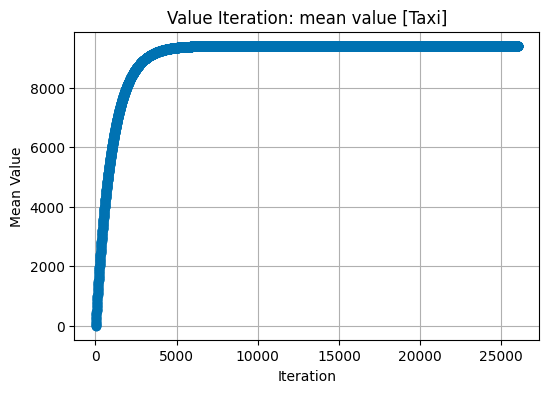

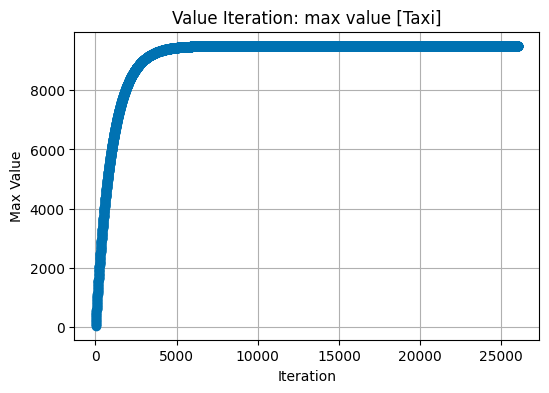

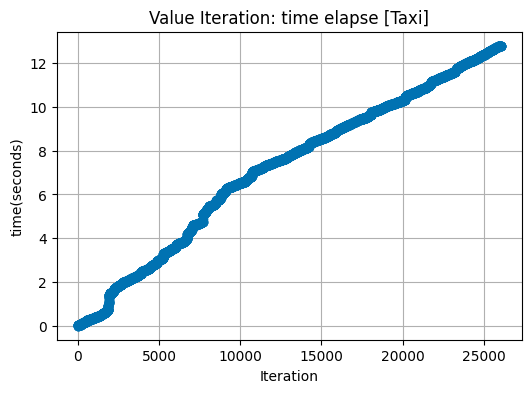

In [19]:
from utils import *
args = {"transitions":P, "reward":R, "gamma":0.999,"epsilon":10**(-10), "max_iter":10**4, "skip_check":True}
vi = mdp.ValueIteration(**args)
vi.run()
print(vi)
vi_result = record(vi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(vi_result["Mean V"])
print("max mean v", max(vi_result["Mean V"]))
plot_data(vi_result["Iteration"], vi_result["Mean V"], 
                 "Iteration", "Mean Value", "Value Iteration: mean value [Taxi]", figure_size=(6,4), style = '0')
plot_data(vi_result["Iteration"], vi_result["Max V"], 
                 "Iteration", "Max Value", "Value Iteration: max value [Taxi]", figure_size=(6,4))
plot_data(vi_result["Iteration"], vi_result["times"], 
                 "Iteration", "time(seconds)", "Value Iteration: time elapse [Taxi]", figure_size=(6,4))
